#Plots for visualising data


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('/content/NTD_Capital_Expenditures.csv')

In [53]:
data.head()

,Agency,City,State,NTD ID,Reporter Type,Report Year,Primary UZA Population,Agency VOMS,Mode,TOS,...,Guideway,Stations,Administrative Buildings,Maintenance Buildings,Passenger Vehicles,Other Vehicles,Fare Collection Equipment,Communication & Information Systems,Other,Total
0,MTA New York City Transit,Brooklyn,NY,20008,Full,2021,18351295.0,10075,DR,PT,...,0.0,0.0,2581388.0,0.0,0.0,0.0,0.0,0.0,0.0,2.581388e+06
1,MTA New York City Transit,Brooklyn,NY,20008,Full,2021,18351295.0,10075,HR,DO,...,580896119.0,520940646.0,42088572.0,326477146.0,55297914.0,39911629.0,59659942.0,483766210.0,180958220.0,2.289996e+09
2,MTA New York City Transit,Brooklyn,NY,20008,Full,2021,18351295.0,10075,CB,DO,...,0.0,0.0,0.0,0.0,18302114.0,0.0,0.0,0.0,0.0,1.830211e+07
3,MTA New York City Transit,Brooklyn,NY,20008,Full,2021,18351295.0,10075,MB,DO,...,0.0,0.0,0.0,68384266.0,148192513.0,0.0,0.0,11025.0,0.0,2.165878e+08
4,MTA New York City Transit,Brooklyn,NY,20008,Full,2021,18351295.0,10075,RB,DO,...,0.0,0.0,0.0,2794913.0,0.0,0.0,0.0,0.0,0.0,2.794913e+06


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25356 entries, 0 to 25355
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Agency                               25322 non-null  object 
 1   City                                 25279 non-null  object 
 2   State                                25322 non-null  object 
 3   NTD ID                               25322 non-null  object 
 4   Reporter Type                        25322 non-null  object 
 5   Report Year                          25356 non-null  int64  
 6   Primary UZA Population               24733 non-null  float64
 7   Agency VOMS                          25322 non-null  object 
 8   Mode                                 25117 non-null  object 
 9   TOS                                  25117 non-null  object 
 10  Mode VOMS                            25304 non-null  object 
 11  Guideway                    

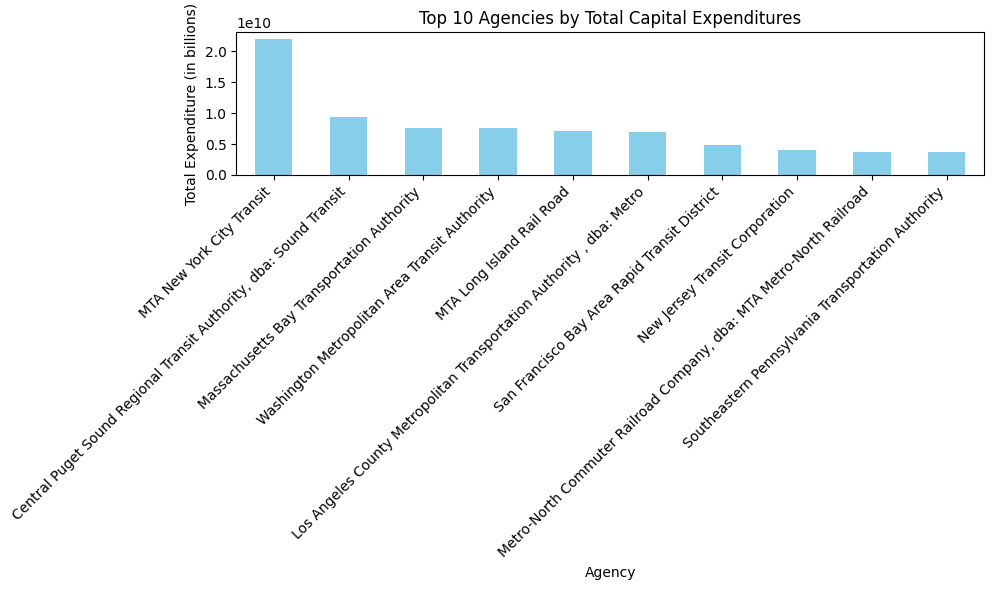

In [55]:
#1
plt.figure(figsize=(10, 6))
data_grouped_agency = data.groupby('Agency')['Total'].sum().sort_values(ascending=False).head(10)
data_grouped_agency.plot(kind='bar', color='skyblue')
plt.title('Top 10 Agencies by Total Capital Expenditures')
plt.ylabel('Total Expenditure (in billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

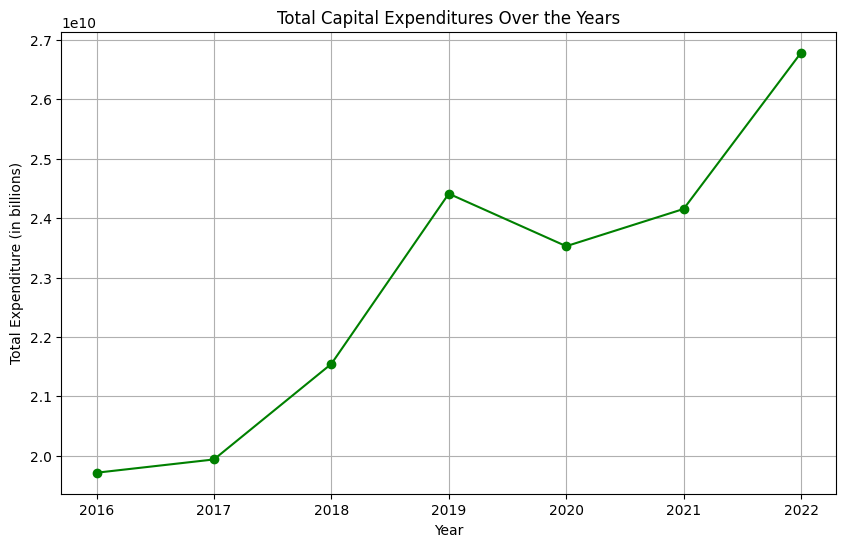

In [56]:
#2
plt.figure(figsize=(10, 6))
data_grouped_year = data.groupby('Report Year')['Total'].sum()
data_grouped_year.plot(kind='line', marker='o', color='green')
plt.title('Total Capital Expenditures Over the Years')
plt.ylabel('Total Expenditure (in billions)')
plt.xlabel('Year')
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

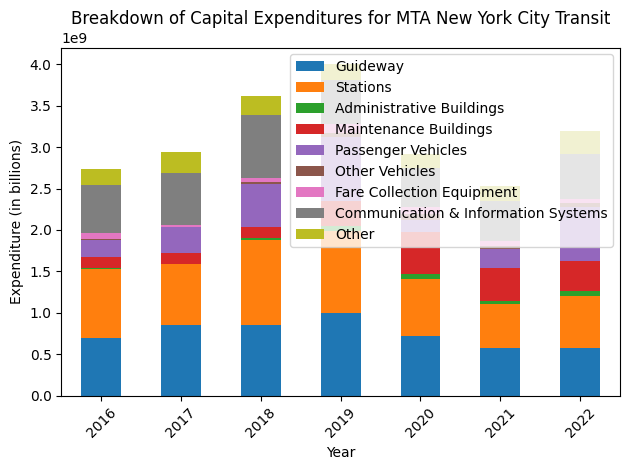

In [57]:
#3
selected_agency = 'MTA New York City Transit'
categories = ['Guideway', 'Stations', 'Administrative Buildings', 'Maintenance Buildings',
              'Passenger Vehicles', 'Other Vehicles', 'Fare Collection Equipment',
              'Communication & Information Systems', 'Other']

agency_data = data[data['Agency'] == selected_agency].groupby('Report Year')[categories].sum()

plt.figure(figsize=(10, 6))
agency_data.plot(kind='bar', stacked=True)
plt.title(f'Breakdown of Capital Expenditures for {selected_agency}')
plt.ylabel('Expenditure (in billions)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

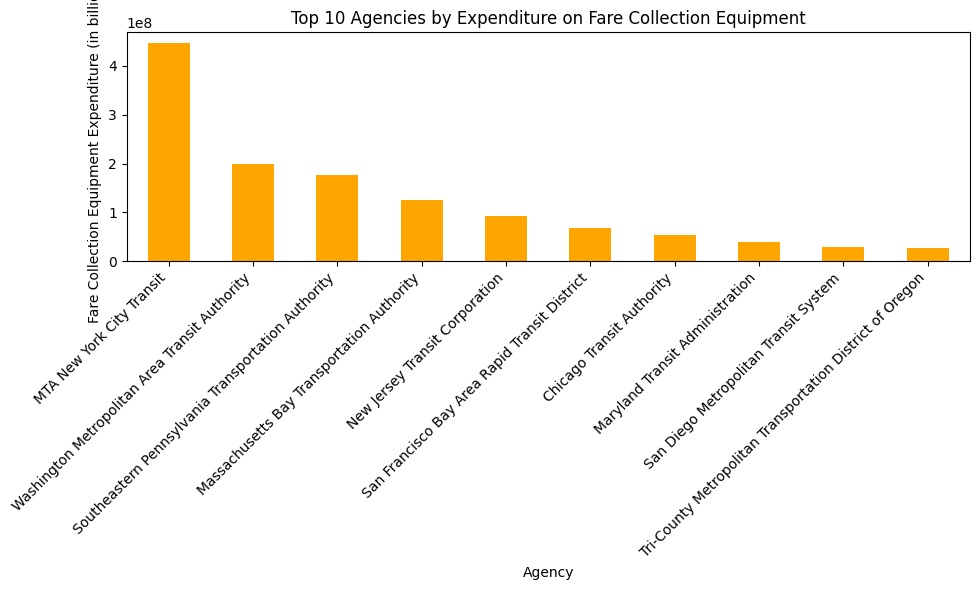

In [58]:
#4
plt.figure(figsize=(10, 6))
data_grouped_fare = data.groupby('Agency')['Fare Collection Equipment'].sum().sort_values(ascending=False).head(10)
data_grouped_fare.plot(kind='bar', color='orange')
plt.title('Top 10 Agencies by Expenditure on Fare Collection Equipment')
plt.ylabel('Fare Collection Equipment Expenditure (in billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

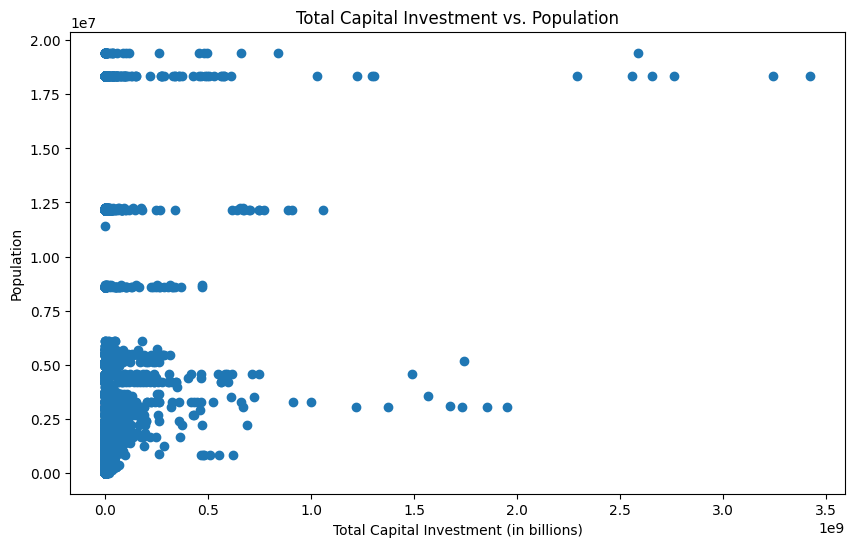

In [59]:
#5
plt.figure(figsize=(10, 6))
plt.scatter(data['Total'], data['Primary UZA Population'])
plt.title('Total Capital Investment vs. Population')
plt.xlabel('Total Capital Investment (in billions)')
plt.ylabel('Population')
plt.show()


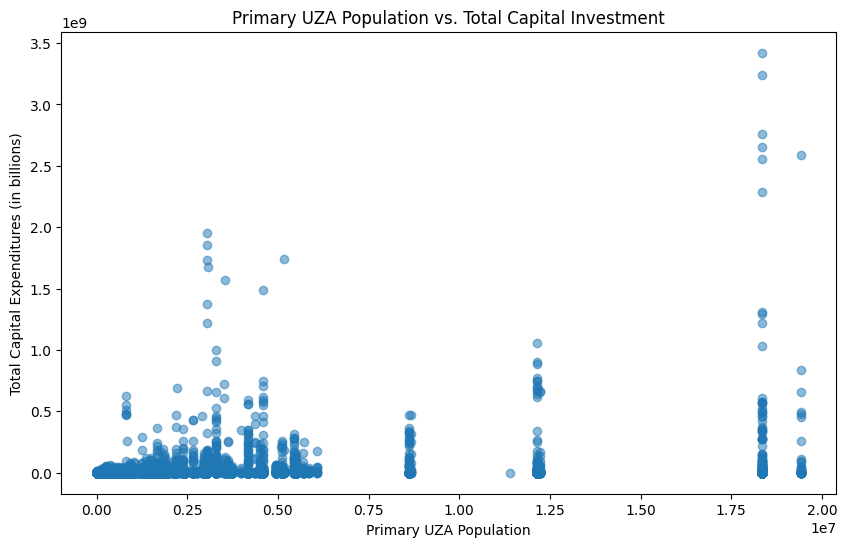

In [60]:
#6
plt.figure(figsize=(10, 6))
plt.scatter(data['Primary UZA Population'], data['Total'], alpha=0.5)
plt.title('Primary UZA Population vs. Total Capital Investment')
plt.xlabel('Primary UZA Population')
plt.ylabel('Total Capital Expenditures (in billions)')
plt.show()


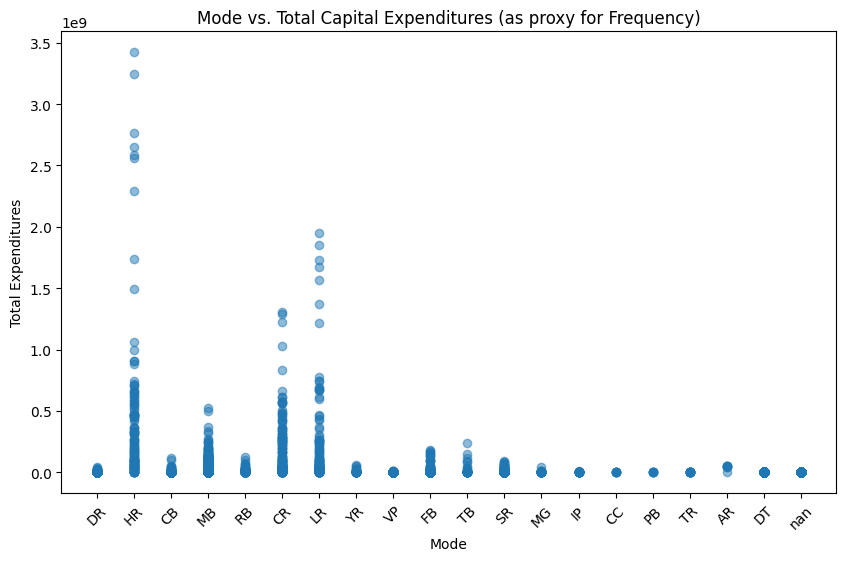

In [61]:
#7
plt.figure(figsize=(10, 6))

data['Mode'] = data['Mode'].astype(str)

plt.scatter(data['Mode'], data['Total'], alpha=0.5)
plt.title('Mode vs. Total Capital Expenditures (as proxy for Frequency)')
plt.xlabel('Mode')
plt.ylabel('Total Expenditures')
plt.xticks(rotation=45)
plt.show()


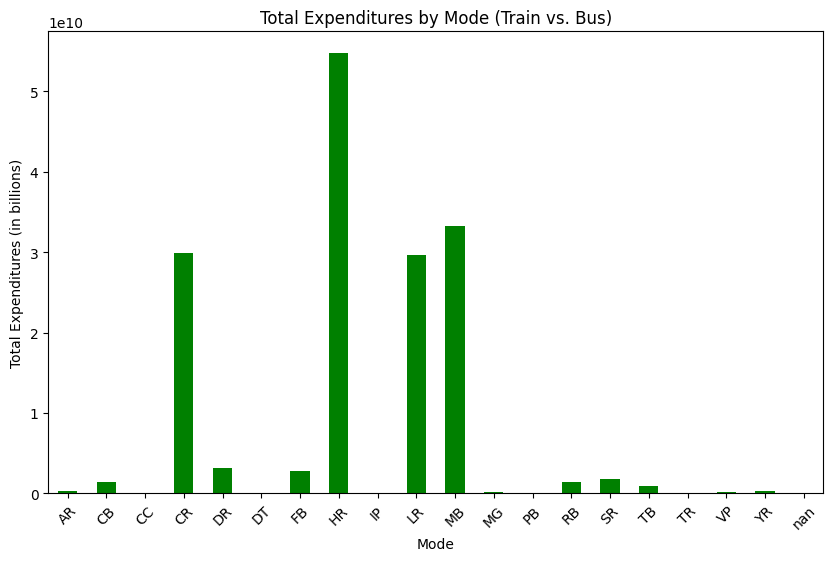

In [62]:
#8
modes = data.groupby('Mode')['Total'].sum()
plt.figure(figsize=(10, 6))
modes.plot(kind='bar', color='green')
plt.title('Total Expenditures by Mode (Train vs. Bus)')
plt.ylabel('Total Expenditures (in billions)')
plt.xticks(rotation=45)
plt.show()


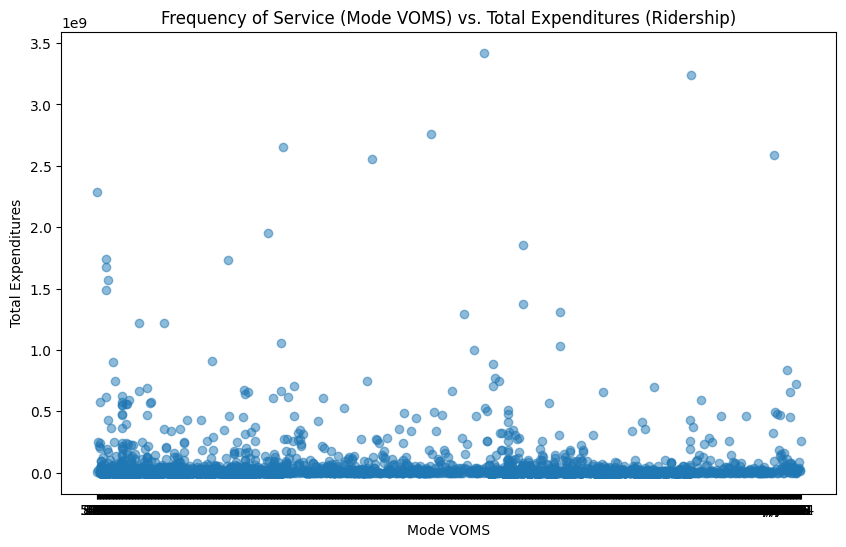

In [63]:
#9
plt.figure(figsize=(10, 6))
data['Mode VOMS'] = data['Mode VOMS'].astype(str)
plt.scatter(data['Mode VOMS'], data['Total'], alpha=0.5)
plt.title('Frequency of Service (Mode VOMS) vs. Total Expenditures (Ridership)')
plt.xlabel('Mode VOMS')
plt.ylabel('Total Expenditures')
plt.show()